In [46]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model, svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import os

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)

# EDA

In [47]:
csv = pd.read_csv('../data/raw/heart.csv', sep=',')
df = csv[csv.Cholesterol != 0]
get_dumm_df = pd.get_dummies(df)

In [48]:
get_dumm_df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [49]:
get_dumm_df.drop(['Sex_F','ExerciseAngina_N','ST_Slope_Flat'], axis= 1, inplace= True)

In [50]:
get_dumm_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,0,0,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,1,0,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,0,0,1


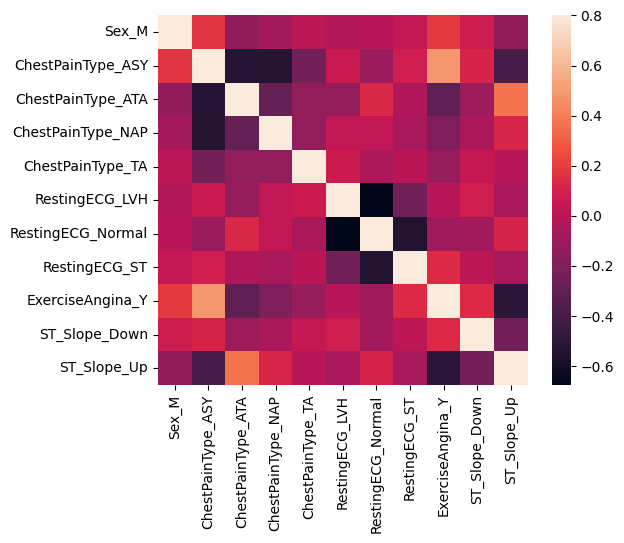

In [51]:
corrmat = get_dumm_df[['Sex_M','ChestPainType_ASY','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','RestingECG_LVH',
                        'RestingECG_Normal','RestingECG_ST','ExerciseAngina_Y','ST_Slope_Down','ST_Slope_Up']
                        ].corr()

sns.heatmap(corrmat, vmax=.8, square=True);

In [52]:
get_dumm_df.drop(['RestingECG_Normal'], axis= 1, inplace= True)

In [53]:
get_dumm_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,0,0,0,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,0,1,0,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,0,0,0,1


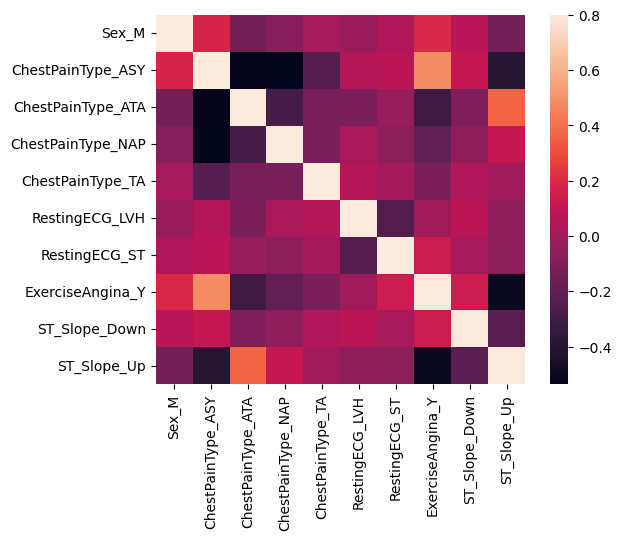

In [54]:
corrmat = get_dumm_df[['Sex_M','ChestPainType_ASY','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','RestingECG_LVH',
                        'RestingECG_ST','ExerciseAngina_Y','ST_Slope_Down','ST_Slope_Up']
                        ].corr()

sns.heatmap(corrmat, vmax=.8, square=True);

In [62]:
get_dumm_df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Up'],
      dtype='object')

V2 columns -> ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Up']

V1 columns -> ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

In [55]:
os.makedirs('../data/processed',exist_ok=True)
get_dumm_df.to_csv('../data/processed/processed_data_V2.csv')

### Train/Test

In [56]:
X = np.array(get_dumm_df.drop(['HeartDisease'], axis = 1))
y = np.array(get_dumm_df['HeartDisease'])
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42)

### PIPELINE

In [57]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())])

    
svc = Pipeline([
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svc", svm.SVC())])

rand_forest_param = {
    'n_estimators': [10,50,100,500,1000],
    'max_features': [1,2,3,4,5],
    'min_samples_leaf' : [5,10,20],
    'max_depth' : [3,5,7,10]
}

rand_forest = RandomForestClassifier()

re_log_param = {
    "imputer__strategy": ['mean', 'median', 'most_frequent'],
    "reglog__penalty": ["l1", "l2"],
    "reglog__C": np.arange(0.1, 4, 0.5)
}

svc_param = {
    "selectkbest__k": [1,2,3],
    "svc__C": np.arange(0.1, 0.9, 0.1),
    "svc__kernel": ['linear', 'poly', 'rbf']
}

gs_reg_log = GridSearchCV(reg_log,
re_log_param,
cv=10,
scoring = 'recall',
n_jobs = -1,
verbose = 1)


gs_svm = GridSearchCV(svc,
svc_param,
cv=10,
scoring = 'recall',
n_jobs = -1,
verbose = 1)

gs_rand_forest = GridSearchCV(rand_forest,
rand_forest_param,
cv=10,
scoring = 'recall',
n_jobs = -1,
verbose = 1)

grids = {
    "gs_reg_log": gs_reg_log,
    "gs_svm": gs_svm,
    "gs_rand_forest": gs_rand_forest}

for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Fitting 10 folds for each of 300 candidates, totalling 3000 fits


In [65]:
grids.items()

dict_items([('gs_reg_log', GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('reglog', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'imputer__strategy': ['mean', 'median',
                                               'most_frequent'],
                         'reglog__C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6]),
                         'reglog__penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)), ('gs_svm', GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3],
                         'svc__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
      

In [58]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]
best_grids

[('gs_reg_log', 0.8342592592592594),
 ('gs_svm', 0.8698412698412697),
 ('gs_rand_forest', 0.8519841269841271)]

In [64]:
print("Best estimator:", gs_svm.best_estimator_)
print("Best params:", gs_svm.best_params_)
print("Best score:", gs_svm.best_score_)

Best estimator: Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=1)),
                ('svc', SVC(C=0.1, kernel='linear'))])
Best params: {'selectkbest__k': 1, 'svc__C': 0.1, 'svc__kernel': 'linear'}
Best score: 0.8698412698412697


In [60]:
y_pred_svm = gs_svm.predict(X_test)

In [61]:
print('SVM Test','\n', metrics.confusion_matrix(y_test, y_pred_svm))

SVM Test 
 [[59 12]
 [ 9 70]]
